# WQD 7006 GROUP ASSIGNMENT: CREDIT CARD FRAUD DETECTION

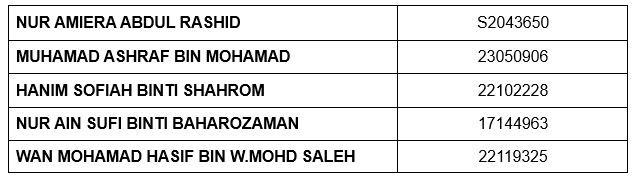

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# df = pd.read_csv('/content/drive/MyDrive/WQD7006 ML/Group 19 Group Assignment ML/creditcard.csv')
df = pd.read_csv("creditcard.csv")

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [5]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
157101,109509.0,1.998948,-0.175304,-0.149598,0.554079,-0.690594,-0.814629,-0.568787,-0.157368,2.688123,...,-0.274023,-0.428032,0.372128,-0.088226,-0.409391,-0.963613,0.029145,-0.034203,1.88,0.0
157102,109509.0,1.990125,-0.196219,-0.158397,0.546181,-0.668480,-0.728145,-0.593549,-0.122374,2.710146,...,-0.270326,-0.418600,0.379359,-0.151898,-0.428487,-0.957452,0.031270,-0.035137,2.12,0.0
157103,109509.0,2.116286,0.096740,-1.196574,0.450276,0.329711,-0.755367,0.122711,-0.410186,1.769695,...,-0.477837,-0.955721,0.259092,-0.696955,-0.205646,0.197980,-0.093699,-0.072037,0.89,0.0
157104,109511.0,-1.004891,1.821790,-1.616041,1.004526,1.201492,0.486138,1.399575,0.109352,0.357845,...,-0.102863,0.149203,-0.340326,-0.362478,0.110553,-0.439865,0.003410,0.149800,136.57,0.0
157105,109512.0,-1.940684,2.384843,-1.809379,-1.074683,0.167806,-1.652473,0.775764,0.491639,1.385711,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1. Data Understanding

In [6]:
df.shape

(157106, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157106 entries, 0 to 157105
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    157106 non-null  float64
 1   V1      157106 non-null  float64
 2   V2      157106 non-null  float64
 3   V3      157106 non-null  float64
 4   V4      157106 non-null  float64
 5   V5      157106 non-null  float64
 6   V6      157106 non-null  float64
 7   V7      157106 non-null  float64
 8   V8      157106 non-null  float64
 9   V9      157106 non-null  float64
 10  V10     157106 non-null  float64
 11  V11     157106 non-null  float64
 12  V12     157106 non-null  float64
 13  V13     157106 non-null  float64
 14  V14     157106 non-null  float64
 15  V15     157106 non-null  float64
 16  V16     157106 non-null  float64
 17  V17     157106 non-null  float64
 18  V18     157106 non-null  float64
 19  V19     157105 non-null  float64
 20  V20     157105 non-null  float64
 21  V21     15

In [8]:
df.nunique()

Time       71192
V1        152291
V2        152293
V3        152290
V4        152292
V5        152291
V6        152289
V7        152289
V8        152283
V9        152289
V10       152286
V11       152290
V12       152290
V13       152293
V14       152290
V15       152290
V16       152287
V17       152288
V18       152289
V19       152286
V20       152286
V21       152280
V22       152287
V23       152271
V24       152289
V25       152284
V26       152288
V27       152276
V28       152247
Amount     24114
class          2
dtype: int64

In [9]:
# Check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
class     1
dtype: int64

In [10]:
pip install missingno

<Axes: >

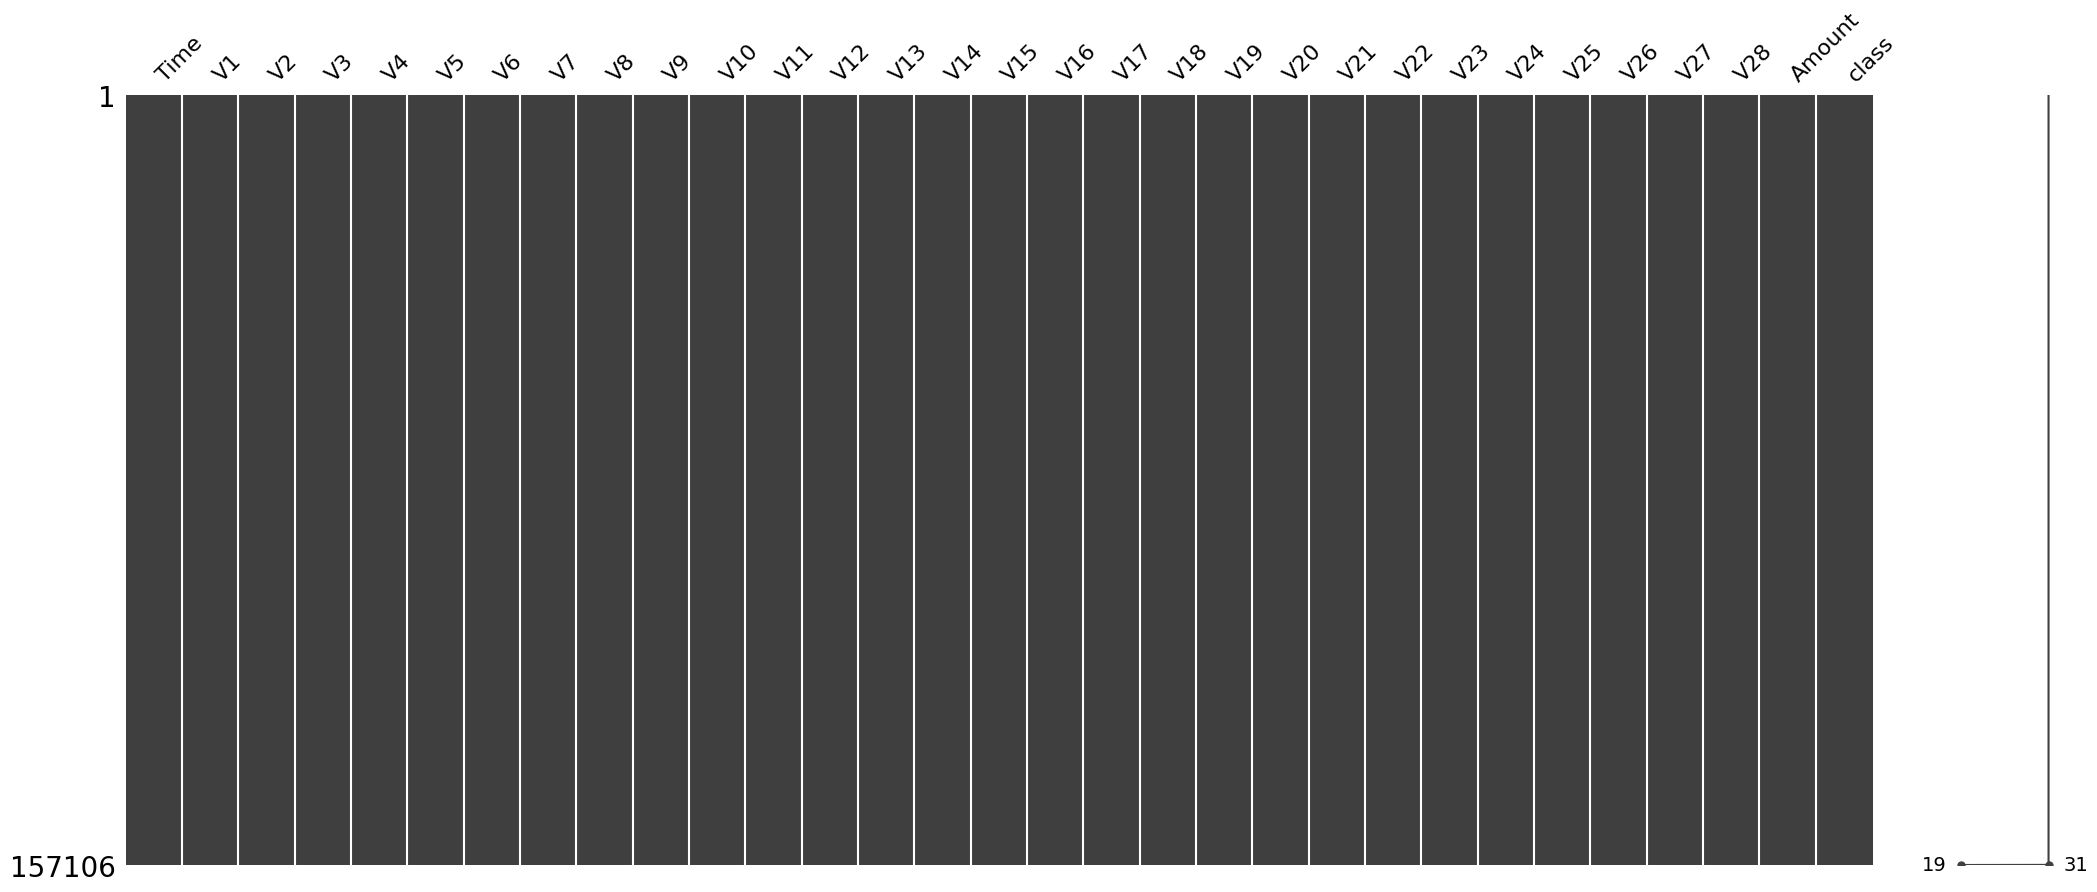

In [11]:
import missingno as mn
mn.matrix(df)

In [12]:
df.duplicated().any()

True

In [13]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
count,157106.000000,157106.000000,157106.000000,157106.000000,157106.000000,157106.000000,157106.000000,157106.000000,157106.000000,157106.000000,...,157105.000000,157105.000000,157105.000000,157105.000000,157105.000000,157105.000000,157105.000000,157105.000000,157105.000000,157105.000000
mean,56281.149918,-0.225140,0.049012,0.591738,0.139655,-0.224330,0.070115,-0.101547,0.045716,0.004711,...,-0.037929,-0.107720,-0.026895,0.008808,0.109374,0.019011,0.001313,0.002395,88.146612,0.002241
std,23547.163836,1.844720,1.623053,1.343634,1.360587,1.333221,1.291565,1.215069,1.246810,1.156260,...,0.748693,0.650448,0.588607,0.596393,0.453727,0.493109,0.393988,0.311791,246.219234,0.047281
min,0.000000,-56.407510,-72.715728,-33.680984,-5.519697,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,39770.000000,-1.014725,-0.534303,0.075861,-0.718386,-0.863330,-0.675850,-0.597827,-0.148128,-0.672448,...,-0.231608,-0.551314,-0.171437,-0.329605,-0.167902,-0.327507,-0.064231,-0.012693,5.800000,0.000000
50%,57582.000000,-0.252548,0.122191,0.695272,0.152733,-0.268721,-0.187874,-0.047886,0.069016,-0.096699,...,-0.060747,-0.084691,-0.040960,0.061906,0.150949,-0.056736,0.010296,0.022489,22.000000,0.000000
75%,74832.750000,1.168147,0.810039,1.336110,0.970878,0.309943,0.458405,0.440635,0.364317,0.623473,...,0.114528,0.324407,0.091413,0.411130,0.409528,0.285675,0.089523,0.078089,78.000000,0.000000
max,109512.000000,2.439207,22.057729,9.382558,16.875344,34.801666,22.529298,36.677268,20.007208,15.594995,...,27.202839,10.503090,19.002942,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


**Observations**
- Dataset has total of `284,807 rows` and `31 columns`.
- Dataset contains no null values.
- Dataset contains duplicated values.
- The mean of principle components `V1 - V28` are close to 0, which is expected as a result of PCA which involves centering the data by subtracting the mean.
- The average transaction amount based on the feature `Amount` is approximately 88.35.

# 2. Data Preprocessing

### 2.1 Dropping Duplicated Values

In [14]:
df.drop_duplicates(keep = 'first', inplace = True)
df.duplicated().any()

False

In [15]:
df.shape

(156508, 31)

In [16]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


### 2.2 Check Skewness of Features

In [17]:
df.skew().sort_values()

V8        -9.226551
V23       -5.850864
V17       -5.508868
V2        -4.638062
V3        -4.480693
V1        -3.587319
V27       -2.645100
V14       -2.527887
V7        -2.359587
V12       -2.285081
V16       -1.636630
V25       -0.610890
V15       -0.584568
V24       -0.581389
V5        -0.576020
V18       -0.434874
V22       -0.317058
Time      -0.284753
V19       -0.054907
V13        0.131176
V11        0.414420
V4         0.430623
V9         0.608098
V10        0.621264
V26        0.668702
V6         1.188470
V21        2.378844
V20        2.471333
V28        9.970020
Amount    15.769081
class     21.577648
dtype: float64

- Highly `-vely` skewed features: V8, V23, V2, V17, V1, V5, V12, V3, V20, V14
- Highly `+vely` skewed features: V6, V7, V21, V28, Amount, class

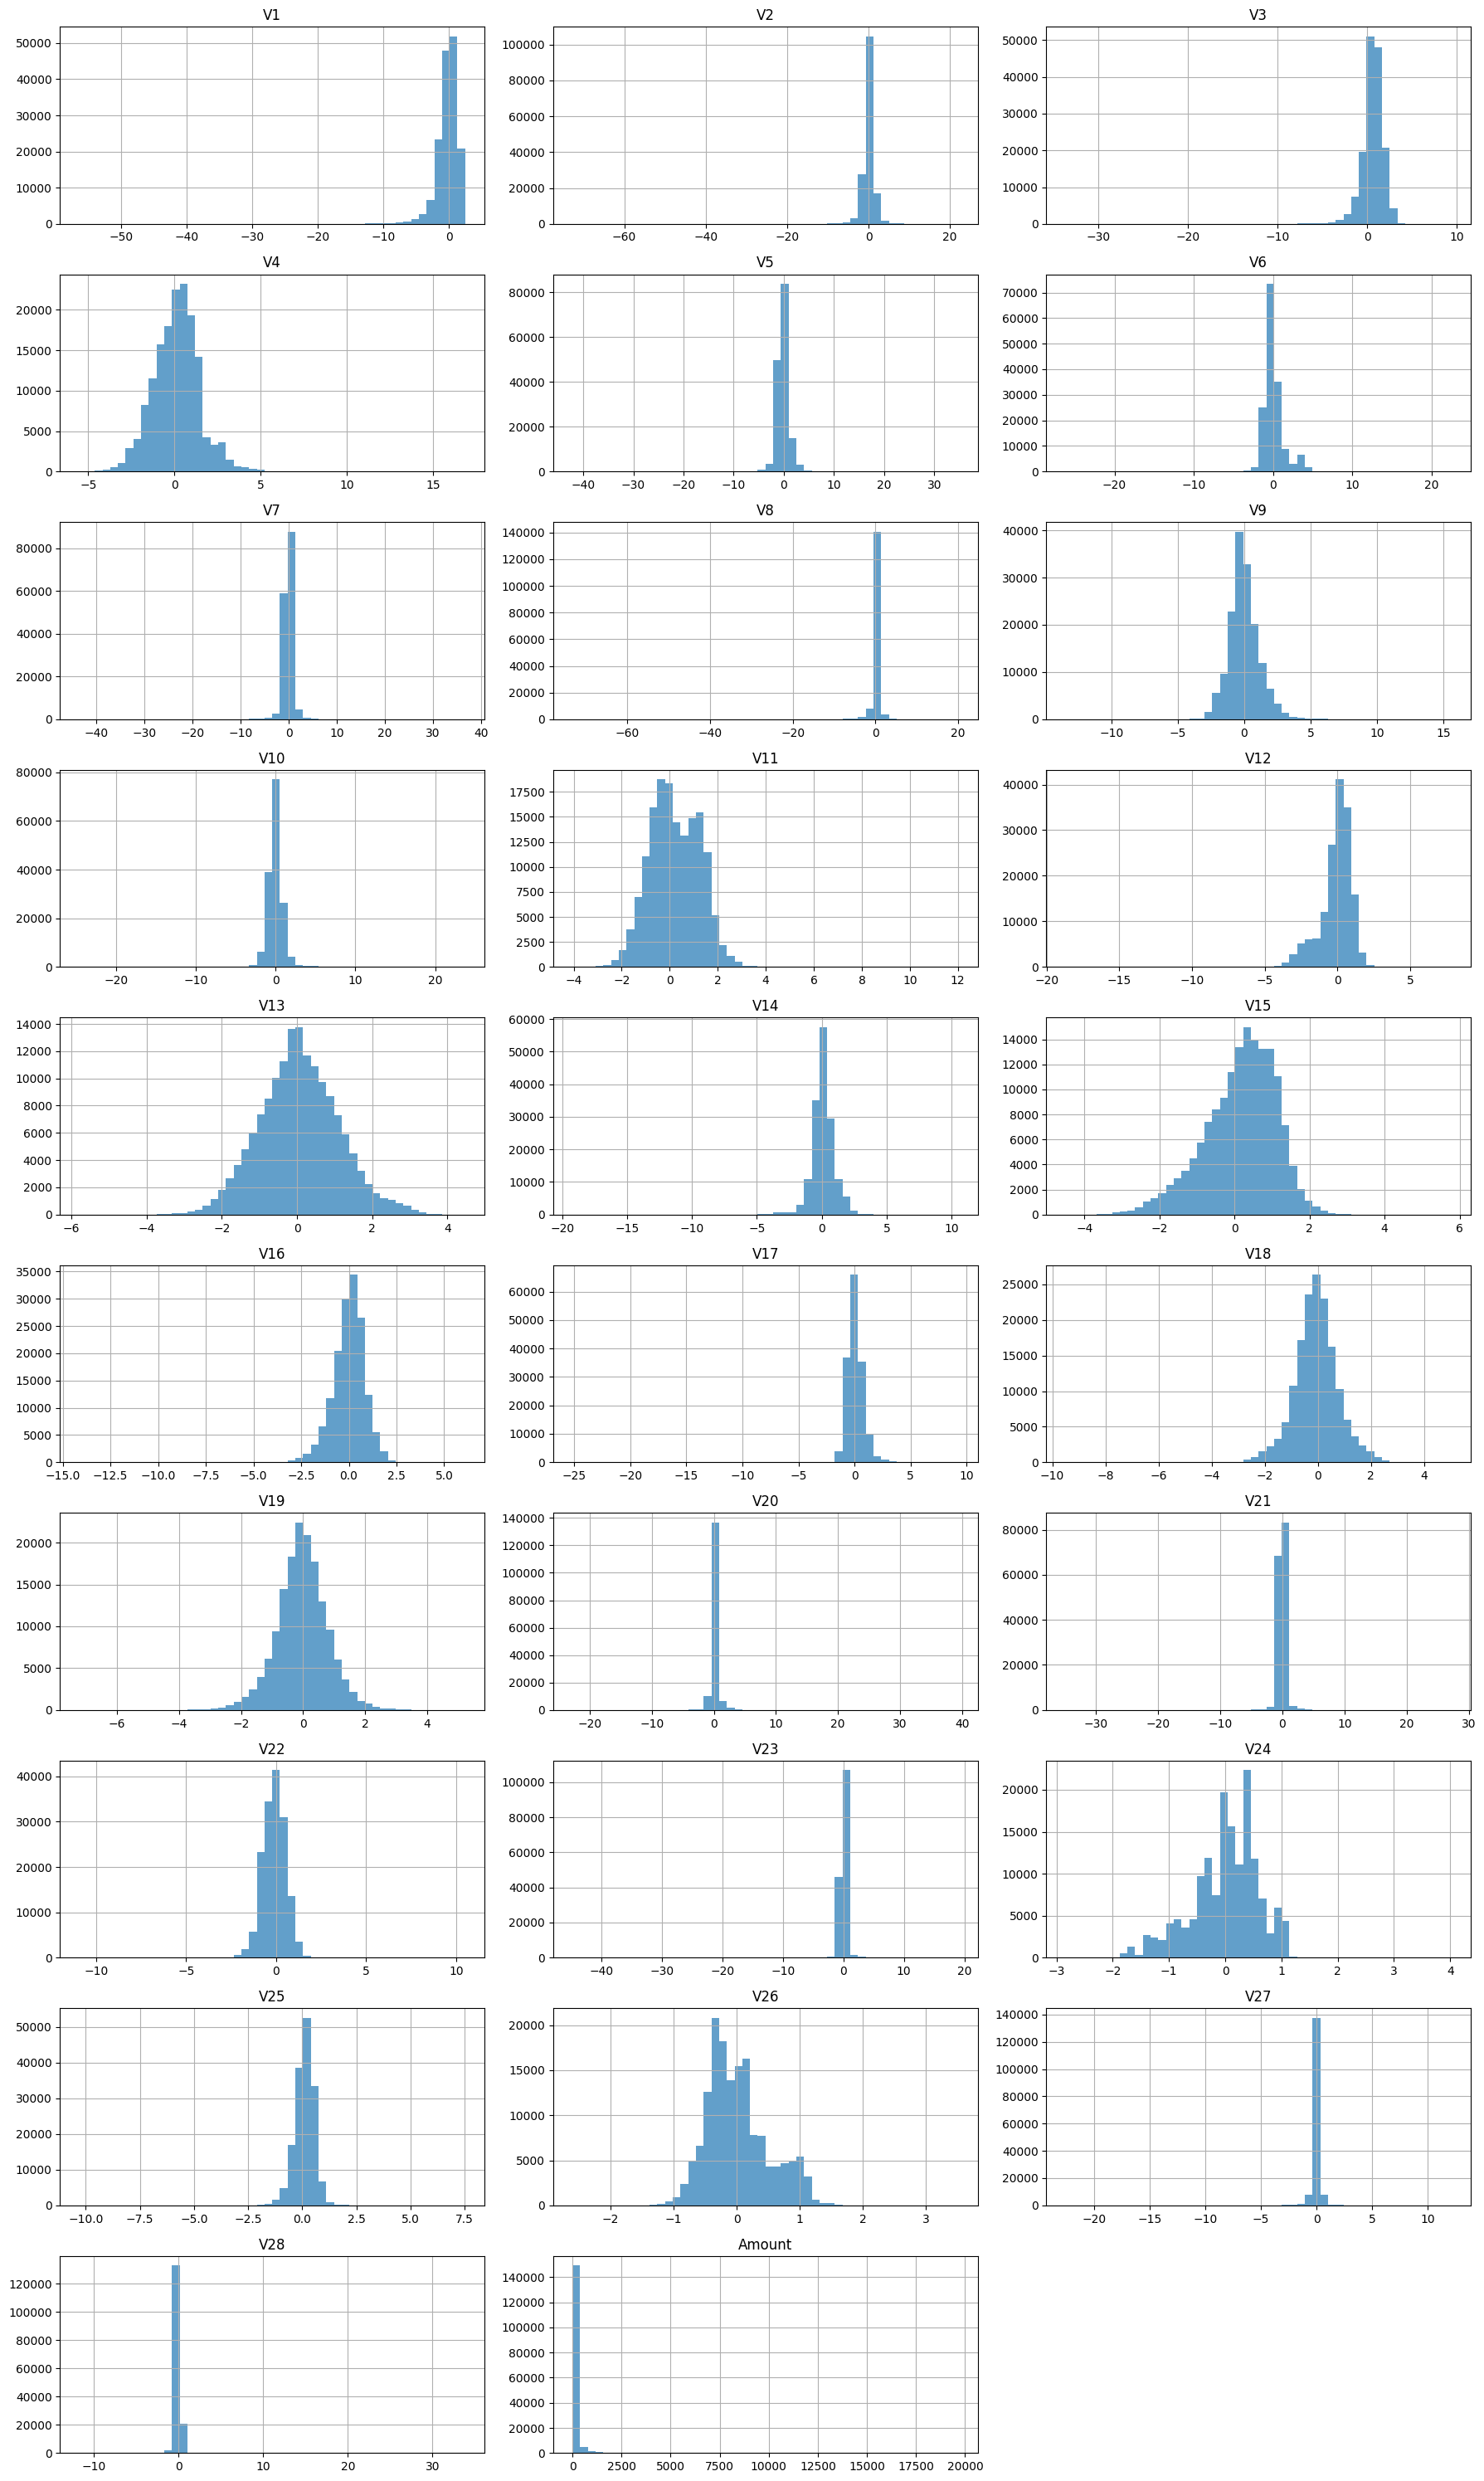

In [18]:
plt.figure(figsize=(18, 30))

# Plot histograms for each column except 'Time' and 'class'
features = df.columns.drop(['Time', 'class'])

# Create a histogram for each feature
for i, feature in enumerate(features):
    plt.subplot(10, 3, i + 1)
    df[feature].hist(bins=50, alpha=0.7)
    plt.title(feature)

plt.tight_layout()
plt.show()

# 3. Data Sampling


### Handling Imbalanced Class

In [19]:
df['class'].value_counts()

class
0.0    156173
1.0       334
Name: count, dtype: int64

,count,distribution
Genuine,156173,99.786591
Fraud,334,0.213409


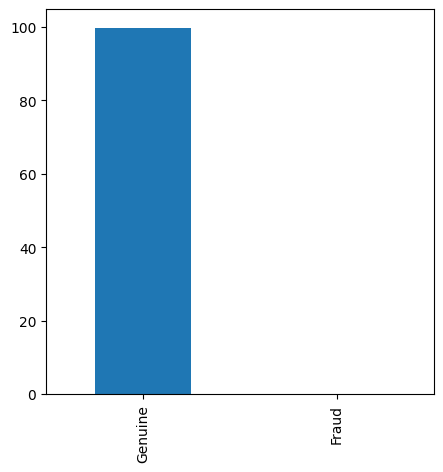

In [20]:
a = df['class'].value_counts().rename('count')
b = (df['class'].value_counts(normalize=True)*100).rename('distribution')

df_class = pd.concat([a,b], axis=1)
df_class.index = ["Genuine", "Fraud"]
df_class['distribution'].plot(kind='bar', figsize=[5,5])
df_class

- The `class` feature demonstrates `'0 - Genuine'` with a relatively higher count than `'1 - Fraud'` presenting an imbalanced distribution.

Due to the imbalanced distribution in `class`, it needs to be addressed prior to ML training and testing. In order to overcome this problem, 2 methods of sampling will be employed:


1.   Oversampling via SMOTE
2.   Undersampling



SMOTE stands for Synthetic Minority Oversampling Technique.This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases.

Remove Null

In [21]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
class     1
dtype: int64

In [22]:
# Checking how many rows contain nulls
null_rows_count = df.isnull().any(axis=1).sum()
print(f"Number of rows with at least one NaN value: {null_rows_count}")


Number of rows with at least one NaN value: 1


In [23]:
print(f"Shape before removing null: {df.shape}" )

df= df.dropna()

print(f"Shape after removing null: {df.shape}")

Shape before removing null: (156508, 31)
Shape after removing null: (156507, 31)


A total of 1 row containing null values is removed

### 3.1 Splitting the Dataset (X = Features, y = Target)

In [24]:
X = df.drop('class', axis = 1)
y = df['class']
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [26]:

# Scale the data
scaler = StandardScaler()
X['scaled_amount'] = scaler.fit_transform(X[['Amount']])
X.drop('Amount', axis=1, inplace=True)



# Split the dataset into training (80%) and testing sets (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Scale the data
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

### 3.2 Oversampling via SMOTE

In [27]:
# Apply SMOTE
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

<ipython-input-28-8e2bc03c2afc>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_smote, palette='viridis')


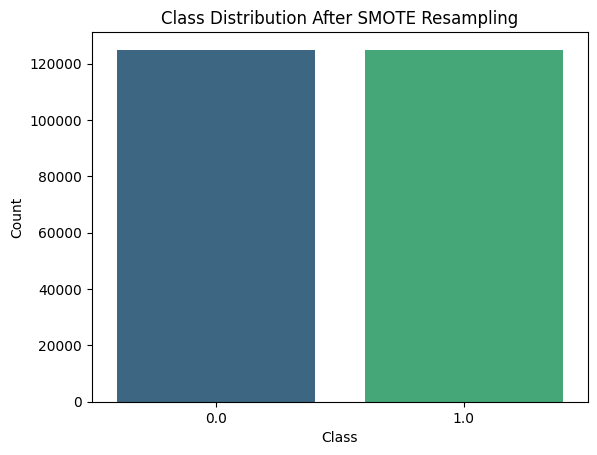

In [28]:
sns.countplot(x=y_train_smote, palette='viridis')
plt.title('Class Distribution After SMOTE Resampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [29]:
print(pd.Series(y_train_smote).value_counts())

class
0.0    124944
1.0    124944
Name: count, dtype: int64


In [30]:
# Model Using Oversampling technique (SMOTE)


# model = RandomForestClassifier(n_estimators=100, random_state=42,max_depth = 3)
# model.fit(X_train_smote, y_train_smote)
# predictions = model.predict(X_test_scaled)
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy:", accuracy)

### 3.3 Undersampling Majority Class



In [31]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Resample the dataset
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

<ipython-input-32-5674ca2fbda8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_rus, palette='viridis')


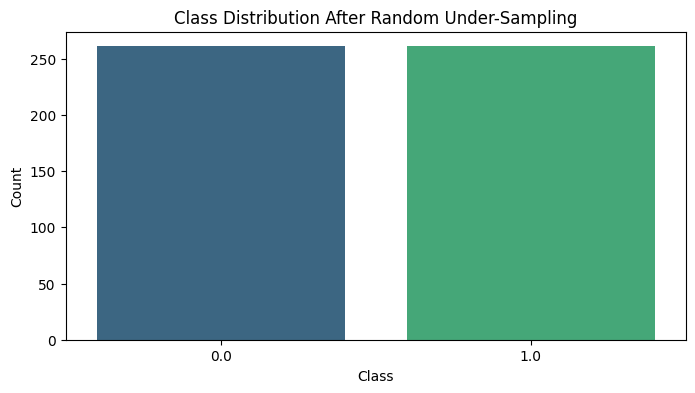

In [32]:
plt.figure(figsize=(8, 4))
sns.countplot(x=y_train_rus, palette='viridis')
plt.title('Class Distribution After Random Under-Sampling')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [33]:
print(pd.Series(y_train_rus).value_counts())

class
0.0    261
1.0    261
Name: count, dtype: int64


## Using Random Forest

- With addressed data imbalance
- Without addressing data imbalance
- Hyper parameter tuning


In [34]:
pip install shap

In [35]:
# from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error,classification_report,confusion_matrix
import shap

Defining function to test accuracy +SHAP explainability for different sampling techniques

In [68]:
def rf_training_testing(sampling_tech, n_estimators=100, random_state=42, max_depth=3):
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state, max_depth=max_depth)

    if sampling_tech == "SMOTE":
        print("Using SMOTE")
        model.fit(X_train_smote, y_train_smote)
    elif sampling_tech == "RUS":
        print("Using Random Undersampling")
        model.fit(X_train_rus, y_train_rus)
    else:
        print("Not using any Sampling Technique")
        model.fit(X_train, y_train)

    # Create SHAP Explainer/TreeExplainer and compute SHAP values
    explainer = shap.Explainer(model)
    # explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_test)


    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(classification_report(y_test, predictions))

    # Plotting the confusion matrix
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()
    print("")

    # Plotting SHAP summary plot for the test data
    shap.summary_plot(shap_values, X_test)

    return print("Accuracy:", accuracy)


## RF (No Sampling Technique)

Not using any Sampling Technique
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     31229
         1.0       0.98      0.60      0.75        73

    accuracy                           1.00     31302
   macro avg       0.99      0.80      0.87     31302
weighted avg       1.00      1.00      1.00     31302



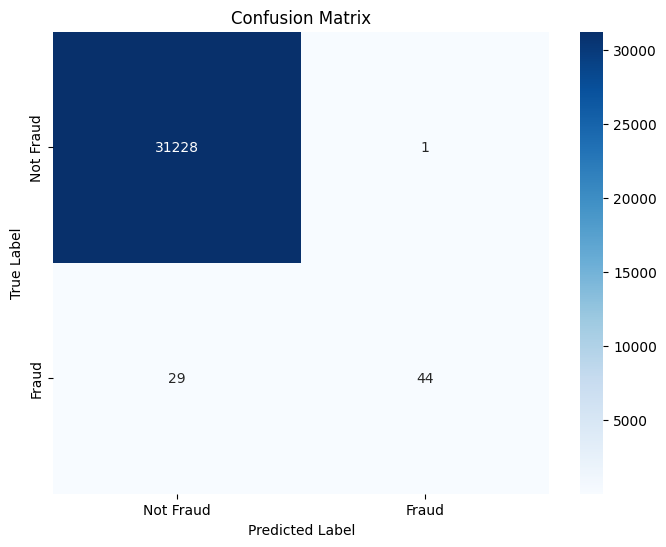

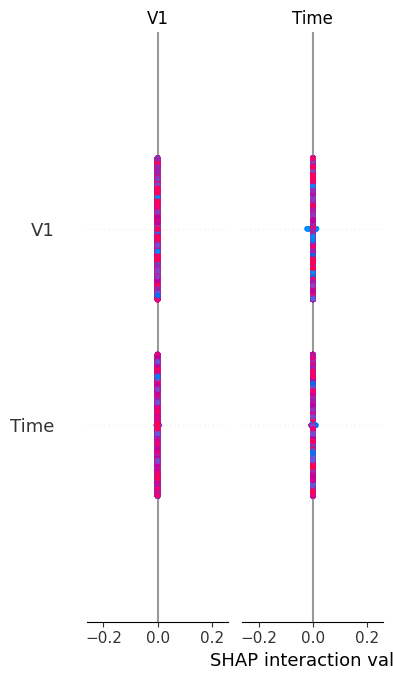

Accuracy: 0.9990415947862756


In [57]:
results_no_samp_tech = rf_training_testing(sampling_tech = "None", n_estimators=100, random_state=42, max_depth = 3)

results_no_samp_tech

Performance Breakdown:

**Precision**  For class 1 (fraudulent), precision is very high at 0.98, showing that almost all predictions of fraud are actually fraudulent.

**Recall** Recall for class 1 is lower at 0.60 compared to class 0(at 1), suggesting that the model only identified 60% of the fraudulent transactions in the test set.

**F1-score** for class 0 is 1.00, reflecting optimal precision and recall. For class 1, the F1-score is 0.75, which is relatively high compared to the other sampling strategies but indicates room for improvement, particularly in recall.

**Support** shows the number of actual instances for each class in the test set, heavily skewed towards non-fraudulent transactions (31229 instances) compared to a small number of fraudulent transactions (73 instances).

## RF using SMOTE

Using SMOTE
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     31229
         1.0       0.39      0.85      0.53        73

    accuracy                           1.00     31302
   macro avg       0.69      0.92      0.77     31302
weighted avg       1.00      1.00      1.00     31302



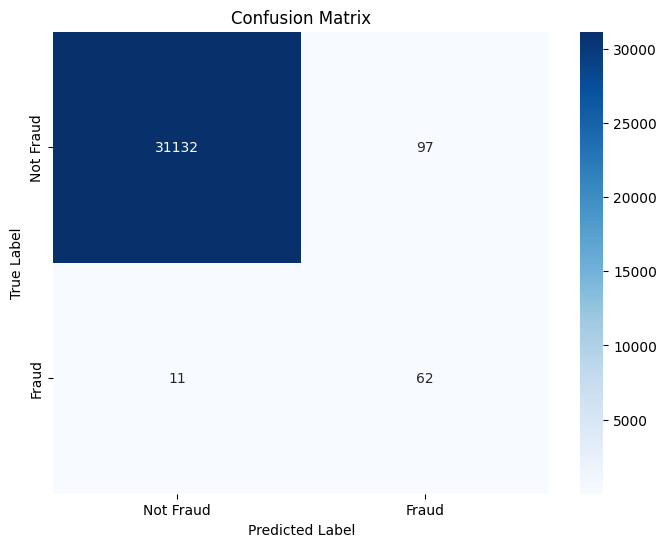

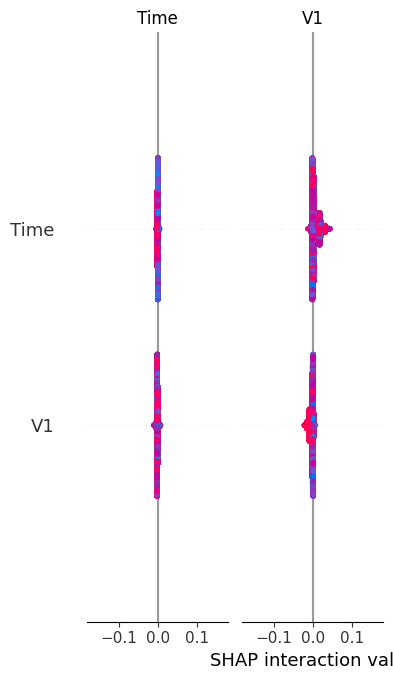

Accuracy: 0.9965497412305923


In [56]:
results_smote = rf_training_testing(sampling_tech = "SMOTE", n_estimators=100, random_state=42, max_depth = 3)

results_smote

**Performance Breakdown:**

**Precision:** for class 0 (non-fraudulent) is recorded at a perfect score of 1.00, indicating that all predictions made by the model as non-fraudulent are correct. However, the precision for class 1 (fraudulent) is considerably lower at 0.39, suggesting that only approximately 39% of the transactions predicted as fraudulent are indeed fraudulent.

**Recall:** for class 0 is also perfect at 1.00, confirming that the model successfully identified all non-fraudulent transactions within the test set. For class 1, the recall is relatively high at 0.85, implying that the model was able to identify 85% of all fraudulent transactions in the test set.

**F1-score:** which combines precision and recall into a single metric, is perfect at 1.00 for class 0, but for class 1, it drops to 0.53. This indicates that while the model is effective in detecting fraudulent transactions (high recall), it is less precise in these predictions.

**Support** indicates the number of true instances for each class in the test data, showing a large discrepancy with most test samples being non-fraudulent (31229 instances) compared to a much smaller number of fraudulent transactions (73 instances).

The overall accuracy of the model is reported as extremely high at 1.00. However, this metric may not be as informative due to the significant class imbalance present in the data—predominantly non-fraudulent transactions.

## RF Using Random Undersampling

Using Random Undersampling
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99     31229
         1.0       0.13      0.85      0.22        73

    accuracy                           0.99     31302
   macro avg       0.56      0.92      0.61     31302
weighted avg       1.00      0.99      0.99     31302



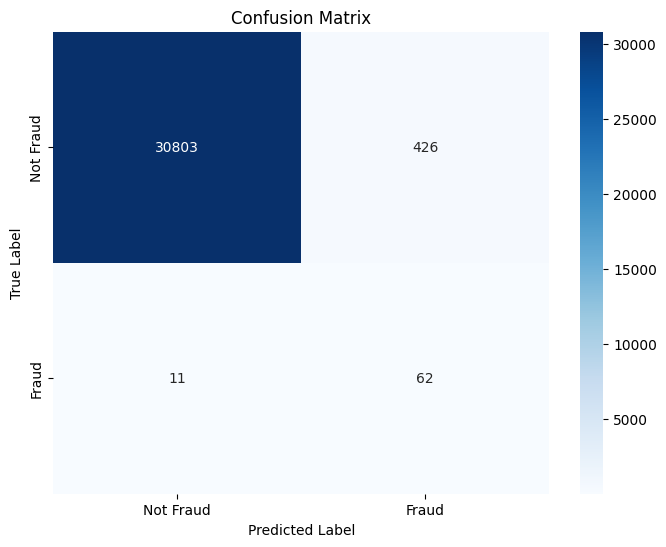

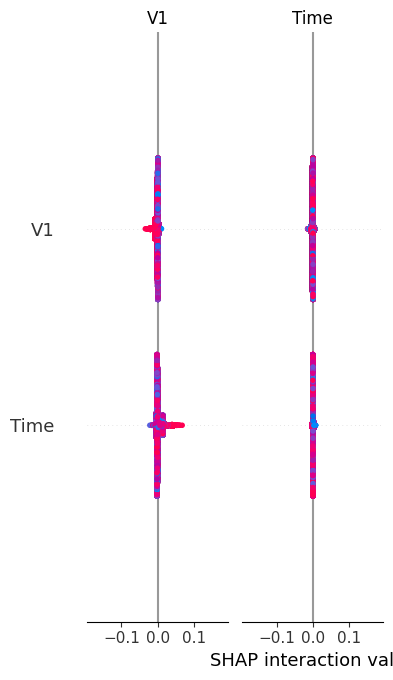

Accuracy: 0.9860392307200818


In [69]:
results_rus = rf_training_testing(sampling_tech = "RUS", n_estimators=100, random_state=42, max_depth = 3)

results_rus

**Performance Breakdown:**

**Precision:** for class 0 (non-fraudulent) remains very high at 1.00, indicating complete accuracy in predictions of non-fraudulent transactions. Conversely, precision for class 1 (fraudulent) is extremely low at 0.13, suggesting that only about 13% of the transactions predicted as fraudulent were actually fraudulent.

**Recall:** for class 0 is nearly perfect at 0.99, which implies the model successfully identified 99% of all non-fraudulent transactions. For class 1, the recall is 0.85, which is relatively high and suggests that the model identified 85% of all fraudulent transactions in the test set.

**F1-score:** for class 0 is very high at 0.99, which reflects a balance between precision and recall. However, for class 1, the F1-score is significantly lower at 0.22, highlighting the challenges in balancing recall and precision for this class under the Random Undersampling strategy.

**Support:** shows the actual number of transactions in each class in the test data, which is highly imbalanced with a majority being non-fraudulent (31229 instances) and a minority being fraudulent (73 instances).
The overall accuracy of the model is high at 0.99, but similar to the SMOTE model, this metric is less informative due to the significant class imbalance.

## Troubleshoot Playground

In [99]:
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression


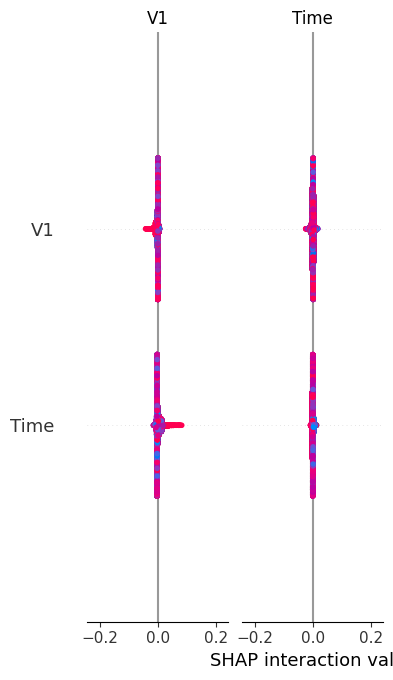

In [109]:
### Testing
n_estimators=100
random_state=42
max_depth=5
learning_rate=0.1

# model_test = xgb.XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, use_label_encoder=False, eval_metric='logloss')
# model_test = DecisionTreeClassifier(random_state=42, max_depth=7)
# model_test = LogisticRegression()

model_test = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state, max_depth=max_depth)

# RUS
model_test.fit(X_train_rus, y_train_rus)
# SMOTE
# model.fit(X_train_smote, y_train_smote)
# explainer = shap.Explainer(model=model_test)
#For logreg
# explainer = shap.Explainer(model=model_test,masker=X_train_rus)
explainer = shap.TreeExplainer(model=model_test)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

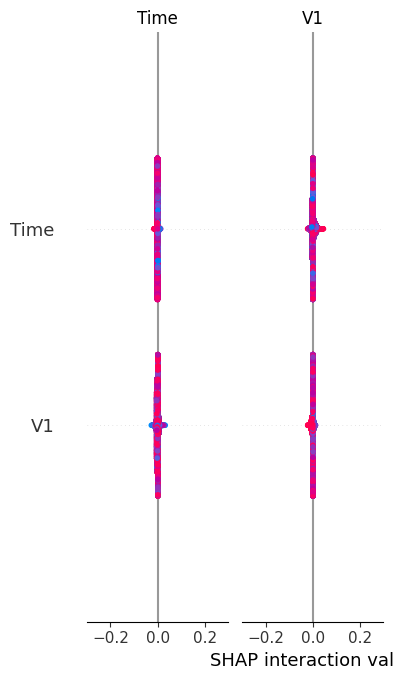

In [39]:
n_estimators=100
random_state=42
max_depth=5
learning_rate=0.1

model_test = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state, max_depth=max_depth,bootstrap=False)
# model_test = xgb.XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, use_label_encoder=False, eval_metric='logloss')
model_test.fit(X_train_rus, y_train_rus)

explainer = shap.TreeExplainer(model=model_test)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)


In [41]:
# RandomForest
importances = model_test.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")
for f in range(X_train.shape[1]):
    print(f"{f + 1}. feature {indices[f]} ({importances[indices[f]]})")


Feature ranking:
1. feature 14 (0.2224333584619633)
2. feature 10 (0.13291912325229455)
3. feature 17 (0.10185776214575439)
4. feature 3 (0.09645769297942523)
5. feature 4 (0.07923179766267137)
6. feature 11 (0.06936262490867443)
7. feature 12 (0.0651656977651187)
8. feature 16 (0.05557979746221021)
9. feature 2 (0.0399946290879732)
10. feature 9 (0.027597655184480388)
11. feature 21 (0.01845740726418659)
12. feature 7 (0.013916691400125416)
13. feature 6 (0.009319656636308698)
14. feature 18 (0.008772672404929007)
15. feature 5 (0.007244404904831187)
16. feature 27 (0.007201667863085019)
17. feature 19 (0.005810176639723597)
18. feature 8 (0.00550240888143091)
19. feature 29 (0.0048040297594632055)
20. feature 22 (0.003614250483350103)
21. feature 25 (0.0035774738432602)
22. feature 23 (0.003341694831653954)
23. feature 1 (0.003205752883684711)
24. feature 26 (0.003091440482816605)
25. feature 28 (0.0024625188309143013)
26. feature 15 (0.0023273801992968555)
27. feature 13 (0.00174942